# Проект по определению критериев успешной игры.

# Описание проекта:

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Изучение общей информации о предоставленных данных

**Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`. Путь к файлу:**

`/datasets/games.csv`

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/datasets/games.csv')

**Посмотрим на первые 10 строк табллицы.**

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Видим, что в предоставленных данных названия столбцов не соответсятвуют правилам, но в таблице присутствуют пропуски, есть несоответсвие типов данных в некоторых столбцах. Всё это мы исправим на следующем этапе.**

### Предобработка данных

#### Приведем названия столбцов к стандартному виду.

In [5]:
data.columns = map(str.lower, data.columns)

#### Посчитаем количество пропусков в таблице.

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Обработаем пропуски в таблице.

В таблице присутствуют две игры без названия, восстановить его по каким либо параметрам из таблице не получится, поэтому целесообразно удалить эти строчки для дальнейшего исследования.

In [9]:
data.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
data = data.dropna(subset=['name']).reset_index(drop=True)

Далее обработаем пропуски в столбце `year_of_release`. Проанализировав данные таблицы я заметил, что некоторые игры выходят сразу на несколько платформ, а значит можно частично заполнить пропуски в данном столбце.

In [11]:
# жизненный срок платформы

years_of_life = data.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

# years_of_life.sort_values(by = 'years_of_life', ascending = False)

,min,max,years_of_life
platform,,,
2600,1980.0,1989.0,9.0
3DO,1994.0,1995.0,1.0
3DS,2011.0,2016.0,5.0
DC,1998.0,2008.0,10.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
GBA,2000.0,2007.0,7.0
GC,2001.0,2007.0,6.0
GEN,1990.0,1994.0,4.0


In [13]:
# жизненный срок платформы

years_of_life = data.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

# years_of_life.sort_values(by = 'years_of_life', ascending = False)

,min,max,years_of_life
platform,,,
2600,1980.0,1989.0,9.0
3DO,1994.0,1995.0,1.0
3DS,2011.0,2016.0,5.0
DC,1998.0,2008.0,10.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
GBA,2000.0,2007.0,7.0
GC,2001.0,2007.0,6.0
GEN,1990.0,1994.0,4.0


Рассмотрев полученные данные пришли к выводу что такое заполнение пропусков искажает статистику и лучше удалить данные об играх без года выпуска, чтобы не искажать срок жизни платформы.
Остальные пропуски в столбце с годом заполнить подобным образом невозможно, поэтому заполним ихх нулями. 

In [14]:
data.drop(data[data['year_of_release'].isna()].index, inplace=True)

В столбце `user_score` найдено значение tbd, которое расшифровывается как: 'To be determined', что обозначает 'Будет определено'. То есть, скорее всего, игра новая и еще не была оценена. Такое значение мы просто заменим на NaN, ведь мы ничего не можем сказать о будущей оценке игры. 

In [15]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [16]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

#### Изменим типы данных для некоторых столбцов. 
**Для столбца `year_of_release` нужно изменить тип с `float` на `int`, так как значение года выражается целым числом, для `user_score` с `object` на `float`, так как оценка пользователя это рациональное число, а не строка, для  `critic_score` с `float` на `int`, так как рейтинг выражается целым числом.**

In [17]:
data[['year_of_release', 'critic_score']] = data[['year_of_release', 'critic_score']].astype('Int64')
data['user_score'] = data['user_score'].astype(float)

#### Заполним пропуски в столбце с рейтингом основываясь на самом распространенном рэйтинге для каждого жанра игр.

In [18]:
genre_list = data['genre'].unique()
genre_dict = {}
for genre in genre_list:
    rating_value_counts = data[data['genre'] == genre]['rating'].value_counts()
    genre_dict[genre] = rating_value_counts.index[0]

data['rating'] = data['rating'].fillna('N')

def fill_rating(row):
    if row[10] == 'N':
        row[10] = genre_dict[row[3]]
    return row

data = data.apply(fill_rating, axis=1)

Посчитаем количество дубликатов.

In [19]:
data.duplicated().sum()

0

#### Добавим столбец с общим значением продаж.

In [20]:
data['avg_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

**Вывод: в таблице довольно много пропусков в столбцах `critic_score` и `user_score`, но с ними мы пока не можем что то сделать, так как новые игрвы просто не успели получить свои оценки пользователей и критиков. Пропуски в столбце `raating` заменили на самые распространенные для каждого жанра значения.**

### Исследовательский анализ данных

#### Посчитаем количество выпущенных игр за каждый год:

In [22]:
year_of_release_table = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
year_of_release_table.columns = ['games_count']
year_of_release_table

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


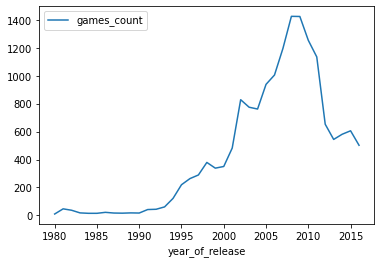

In [23]:
year_of_release_table.plot()
plt.show()

**Видно, что большая часть игр выпускалась начиная с 2000 года, а значит основным периодом для рассмотрения на данный момент выберем промежуток с 2000 года и далее**

#### Посмотрим, как менялись продажи по платформам

,platform,avg_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


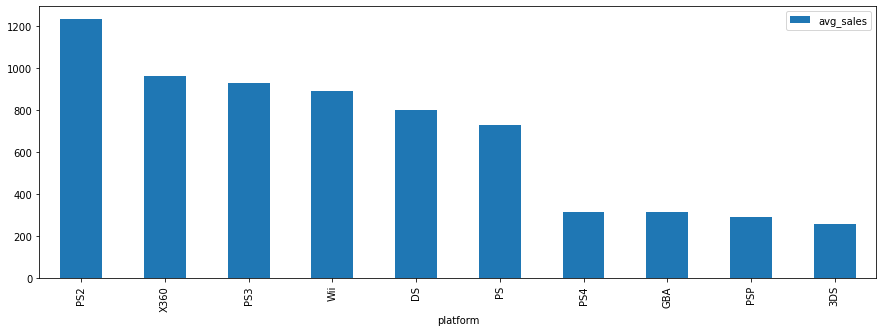

In [24]:
platforms = (
    data
    .pivot_table(index='platform', values='avg_sales', aggfunc='sum')
    .sort_values('avg_sales', ascending=False)
    .reset_index()
)
top_platforms = platforms.head(10)
top_platforms.plot(x='platform', y='avg_sales', kind='bar',figsize=(15,5))
platforms

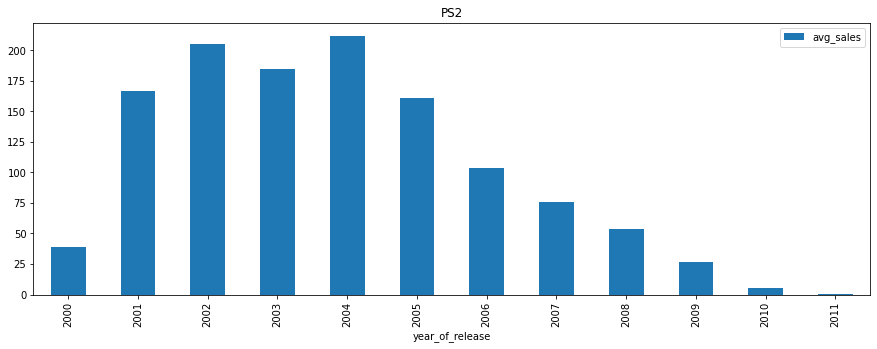

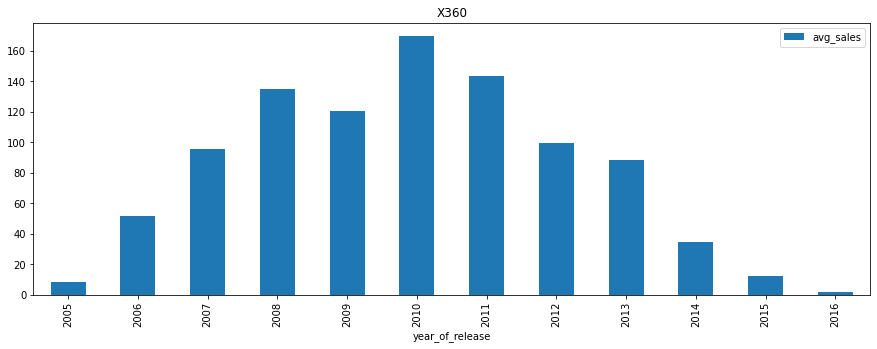

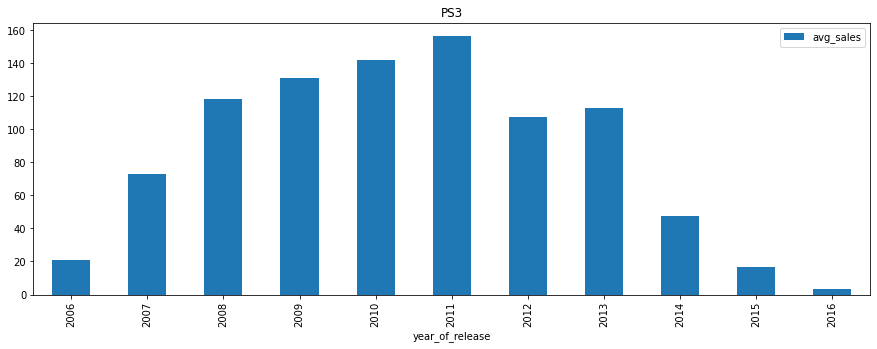

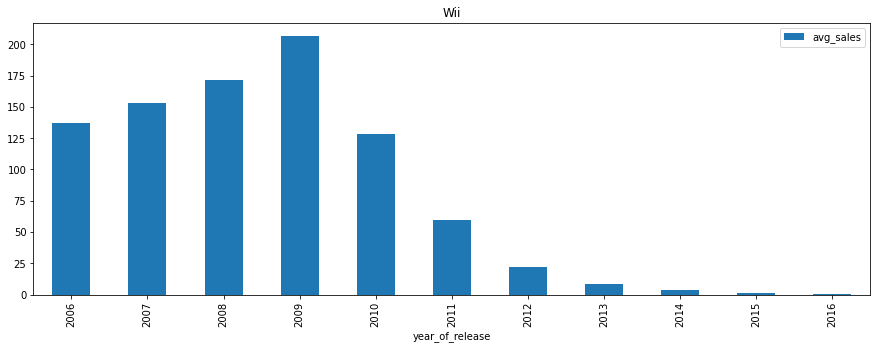

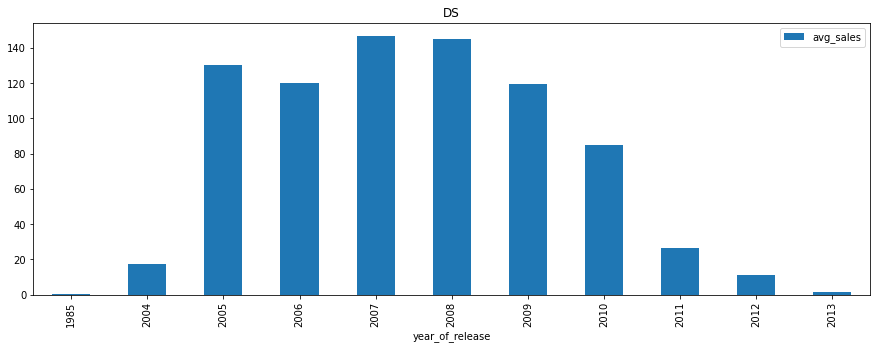

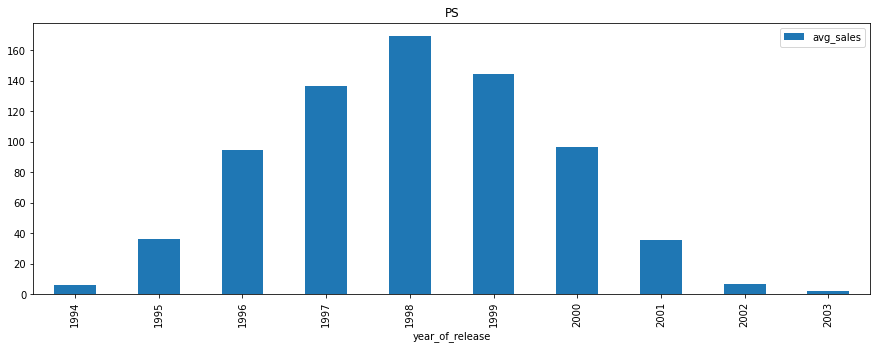

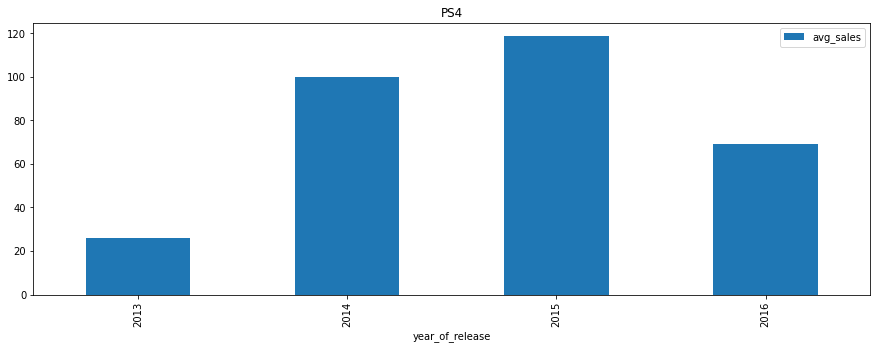

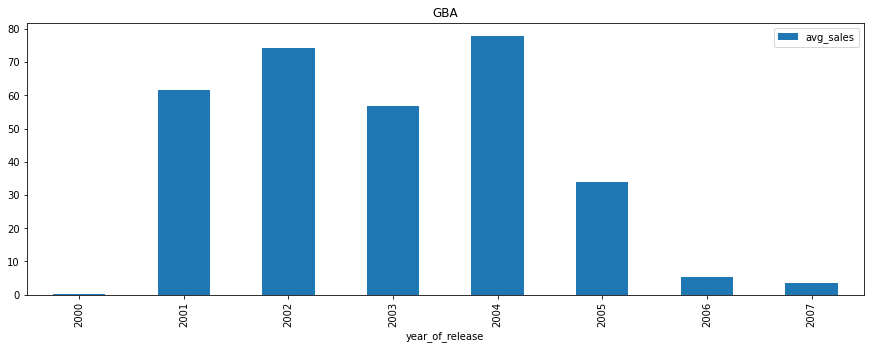

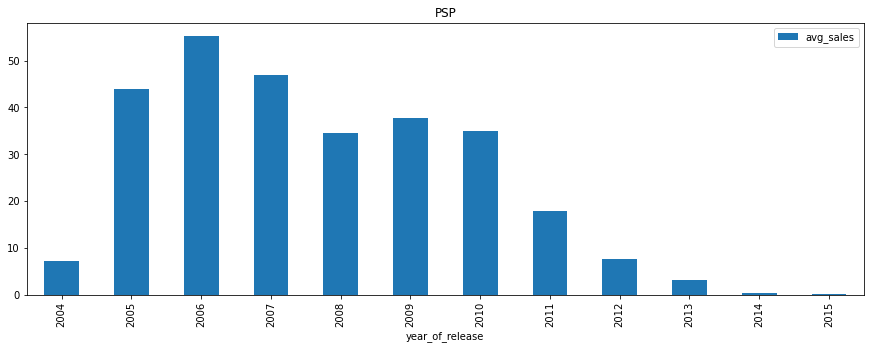

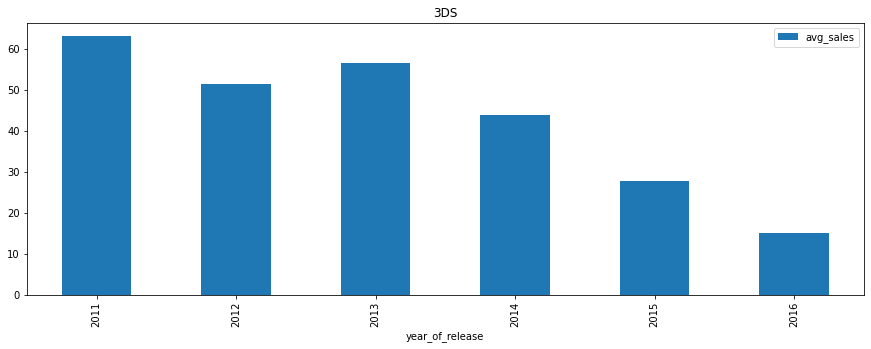

In [25]:
top_platforms_data = data.query('platform in @top_platforms["platform"]')
for platform in top_platforms['platform'].tolist():
    (data[data['platform'] == platform]
     .pivot_table(index='year_of_release', values='avg_sales', aggfunc='sum')
     .plot(kind='bar', figsize=(15,5))
    )
    plt.title(platform)

**Как видно из данных, среднее время жизни платформы около 10 лет, а болльшинство платформ появляется в 2006 году.**

Видно, что у платформы DS присутствует странный выброс в тот год, когда платформа еще не существовала. Удалим эту строчку.

In [26]:
data = data.drop(data[(data.platform == 'DS') & (data.year_of_release == 1985)].index, axis = 0)

**Учитывая данные из предыдущего пункта, определим актуальный период с 2013 по 2016.**

In [27]:
actual_data = data.query('year_of_release >= 2013')

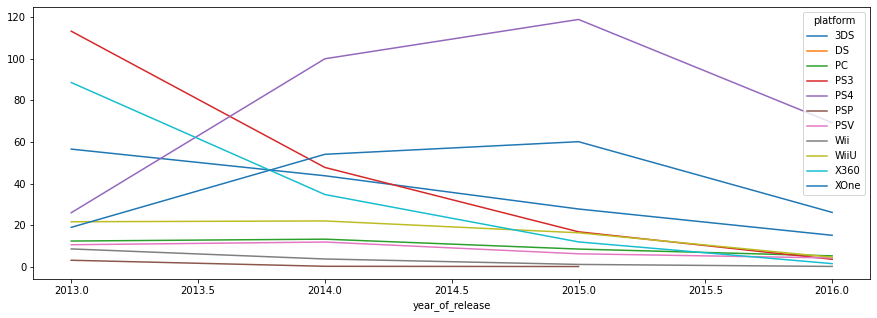

In [28]:
(
    actual_data
    .pivot_table(index='year_of_release', columns='platform', values='avg_sales', aggfunc='sum')
    .plot(figsize=(15, 5))
)
plt.show()

Из графика видно, что продажи растут у PS4, XOne, 3DS, WiiU и PSV. На убыль идут приставки предыдущего поколения PS3, X360, DS, Wii. Так же можно заметить, что PC демонстрирует стабильность и эту платформу в рассмотрение.

В итоге выберем как потенциально прибыльные 6 платформ:
- `PS4`
- `XOne`
- `PC`
- `PSV`
- `3DS`
- `WiiU`

Построим 'ящик с усами' для каждой платформы среди топ платформ.

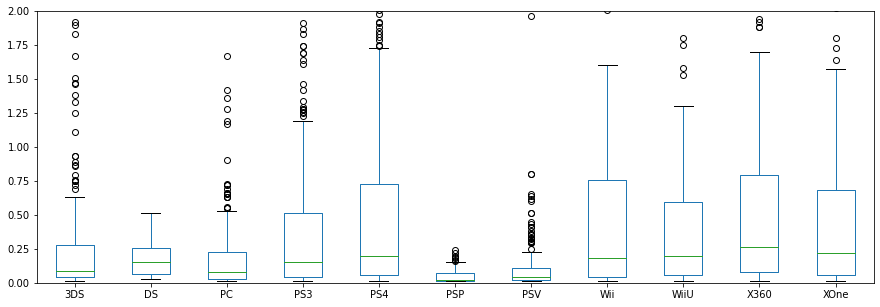

In [29]:
(
    actual_data
    .pivot_table(index='name', columns='platform', values='avg_sales', aggfunc='sum')
    .plot(kind='box', ylim=(0,2), figsize=(15, 5))
)
plt.show()

#### Рассмотрим зависимость количества продаж от оценок критиков и пользователей

##### PS4

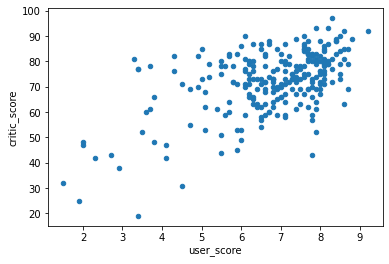

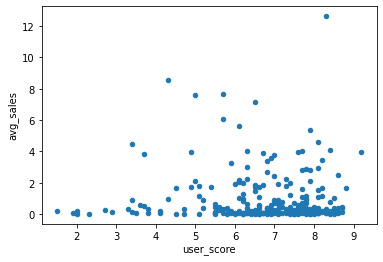

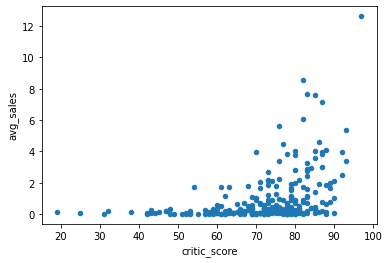

,avg_sales,user_score
avg_sales,1.000000,-0.033625
user_score,-0.033625,1.000000


In [30]:
PS4_data = actual_data.query('platform == "PS4" and (not critic_score.isnull()) and (not user_score.isnull())')
PS4_data.plot(x='user_score', y='critic_score', kind='scatter')
PS4_data.plot(x='user_score', y='avg_sales', kind='scatter')
PS4_data.plot(x='critic_score', y='avg_sales', kind='scatter')
plt.show()
PS4_corr = PS4_data.loc[:,['avg_sales', 'critic_score', 'user_score']]
PS4_corr.corr()

##### XOne

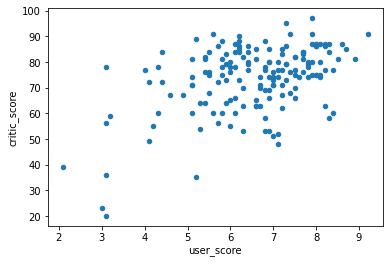

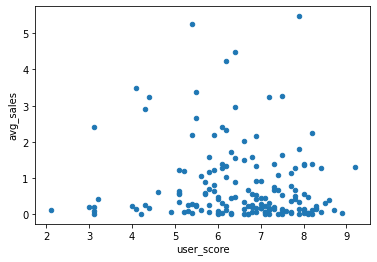

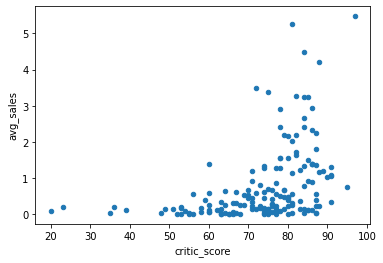

,avg_sales,user_score
avg_sales,1.000000,-0.094003
user_score,-0.094003,1.000000


In [31]:
XOne_data = actual_data.query('platform == "XOne" and (not critic_score.isnull()) and (not user_score.isnull())')
XOne_data.plot(x='user_score', y='critic_score', kind='scatter')

XOne_data.plot(x='user_score', y='avg_sales', kind='scatter')
XOne_data.plot(x='critic_score', y='avg_sales', kind='scatter')
plt.show()
XOne_corr = XOne_data.loc[:,['avg_sales', 'critic_score', 'user_score']]
XOne_corr.corr()

##### PC

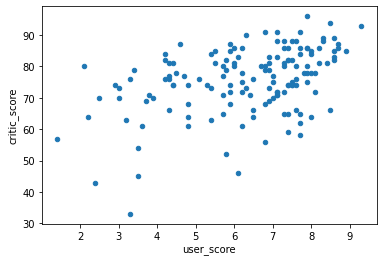

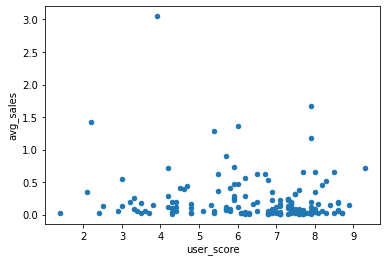

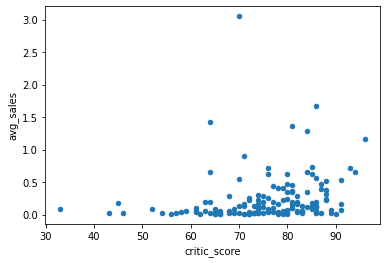

,avg_sales,user_score
avg_sales,1.000000,-0.109235
user_score,-0.109235,1.000000


In [32]:
PC_data = actual_data.query('platform == "PC" and (not critic_score.isnull()) and (not user_score.isnull())')
PC_data.plot(x='user_score', y='critic_score', kind='scatter')
PC_data.plot(x='user_score', y='avg_sales', kind='scatter')
PC_data.plot(x='critic_score', y='avg_sales', kind='scatter')
plt.show()
PC_corr = PC_data.loc[:,['avg_sales', 'critic_score', 'user_score']]
PC_corr.corr()

По выбранным платформам можно сказать, что оценки критиков сильнее влияют на количество продаж, чем оценки пользователей.

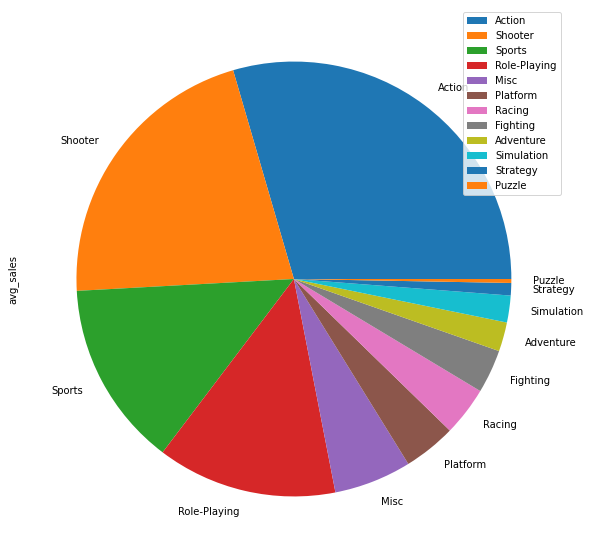

In [33]:
(
    actual_data
    .pivot_table(index ='genre', values='avg_sales', aggfunc='sum')
    .sort_values(ascending=False, by='avg_sales')
    .plot(kind='pie', figsize=(10,10), subplots=True)
)
plt.show()

In [34]:
genres_data = actual_data.pivot_table(index='genre', values='avg_sales', aggfunc='sum').sort_values(by='avg_sales', ascending=False)
genres_data

,avg_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


count    766.000000
mean       0.420196
std        1.253909
min        0.010000
25%        0.030000
50%        0.110000
75%        0.337500
max       21.050000
Name: avg_sales, dtype: float64

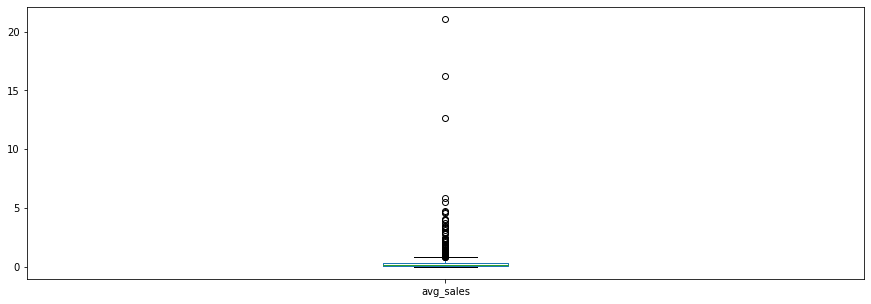

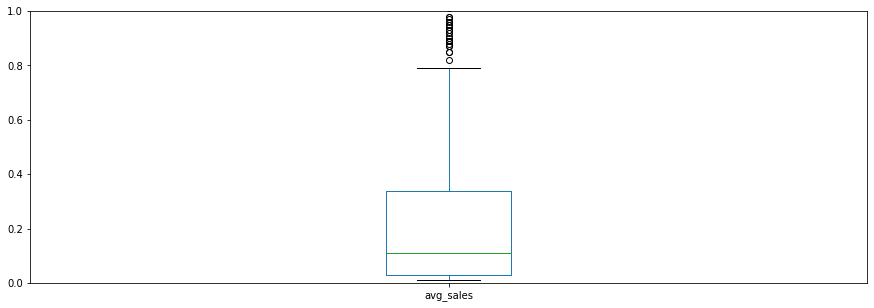

In [35]:
action_data = actual_data.query('genre == "Action"')
action_data.plot(y = 'avg_sales', kind='box', figsize=(15, 5))
action_data.plot(y = 'avg_sales', kind='box', ylim=(0,1), figsize=(15, 5))
action_data['avg_sales'].describe()

count    187.000000
mean       1.245882
std        2.014107
min        0.010000
25%        0.140000
50%        0.450000
75%        1.425000
max       14.630000
Name: avg_sales, dtype: float64

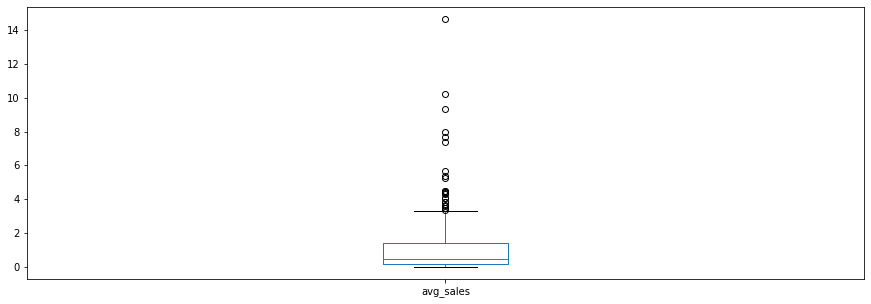

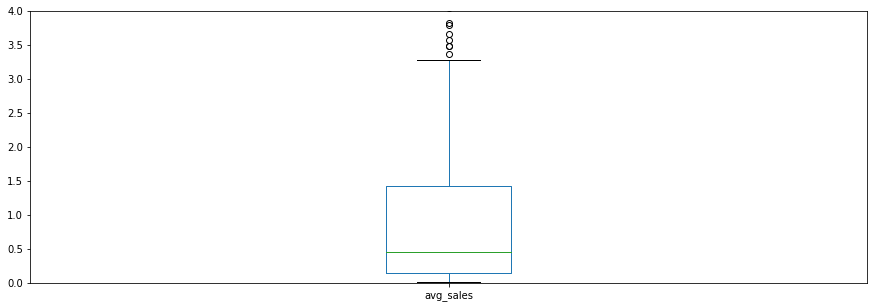

In [36]:
shooter_data = actual_data.query('genre == "Shooter"')
shooter_data.plot(y = 'avg_sales', kind='box', figsize=(15, 5))
shooter_data.plot(y = 'avg_sales', kind='box', ylim=(0,4), figsize=(15, 5))
shooter_data['avg_sales'].describe()

count    214.000000
mean       0.703972
std        1.219237
min        0.010000
25%        0.070000
50%        0.240000
75%        0.765000
max        8.580000
Name: avg_sales, dtype: float64

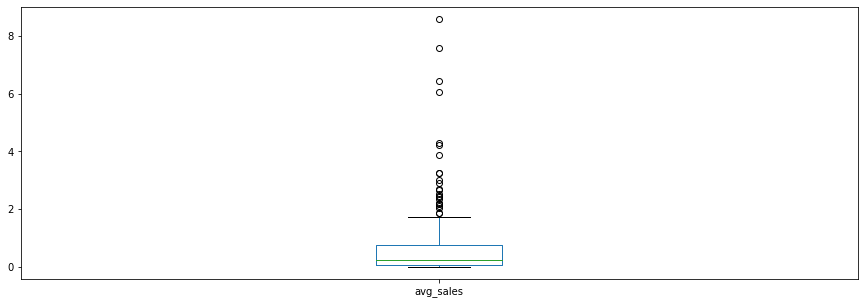

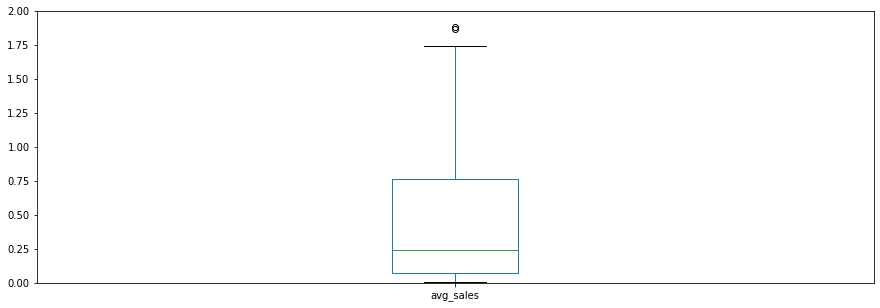

In [37]:
sports_data = actual_data.query('genre == "Sports"')
sports_data.plot(y = 'avg_sales', kind='box', figsize=(15, 5))
sports_data.plot(y = 'avg_sales', kind='box', ylim=(0,2), figsize=(15, 5))
sports_data['avg_sales'].describe()

count    292.000000
mean       0.499623
std        1.353164
min        0.010000
25%        0.060000
50%        0.125000
75%        0.382500
max       14.600000
Name: avg_sales, dtype: float64

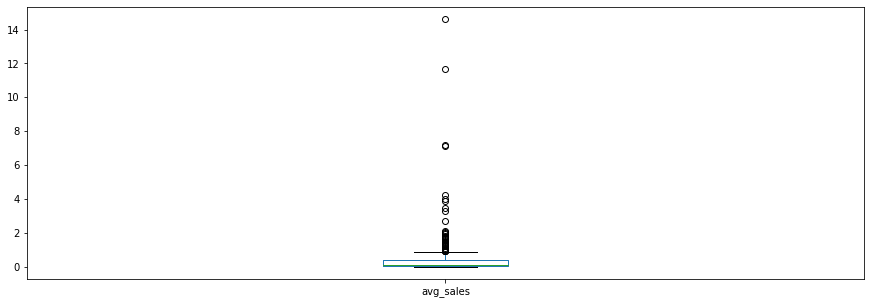

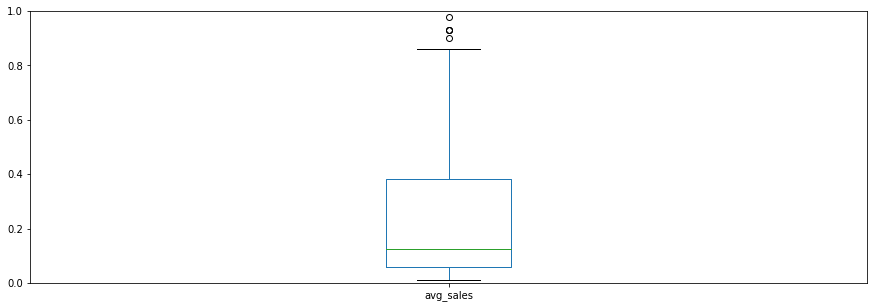

In [38]:
role_playing_data = actual_data.query('genre == "Role-Playing"')
role_playing_data.plot(y = 'avg_sales', kind='box', figsize=(15, 5))
role_playing_data.plot(y = 'avg_sales', kind='box', ylim=(0,1), figsize=(15, 5))
role_playing_data['avg_sales'].describe()

count    155.000000
mean       0.405290
std        1.007985
min        0.010000
25%        0.030000
50%        0.100000
75%        0.330000
max        9.180000
Name: avg_sales, dtype: float64

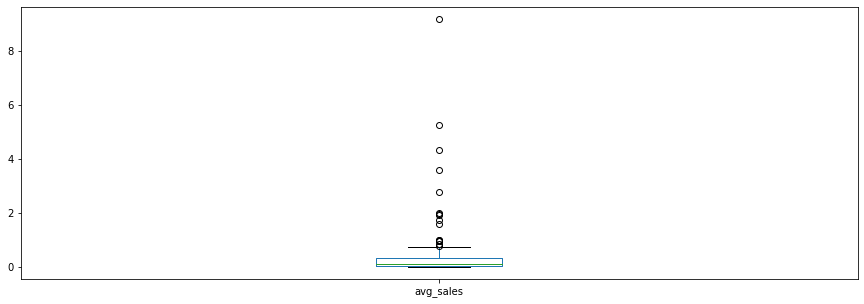

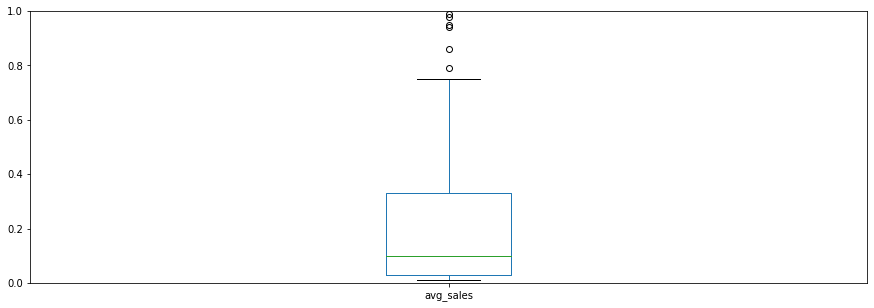

In [39]:
misc_data = actual_data.query('genre == "Misc"')
misc_data.plot(y = 'avg_sales', kind='box', figsize=(15, 5))
misc_data.plot(y = 'avg_sales', kind='box', ylim=(0,1), figsize=(15, 5))
misc_data['avg_sales'].describe()

count    74.000000
mean      0.576081
std       0.806808
min       0.010000
25%       0.090000
50%       0.225000
75%       0.627500
max       4.320000
Name: avg_sales, dtype: float64

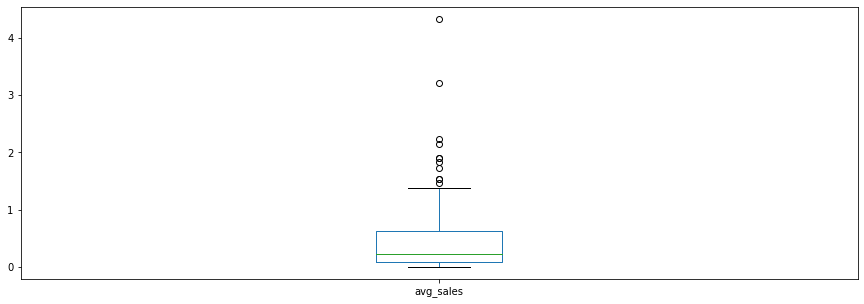

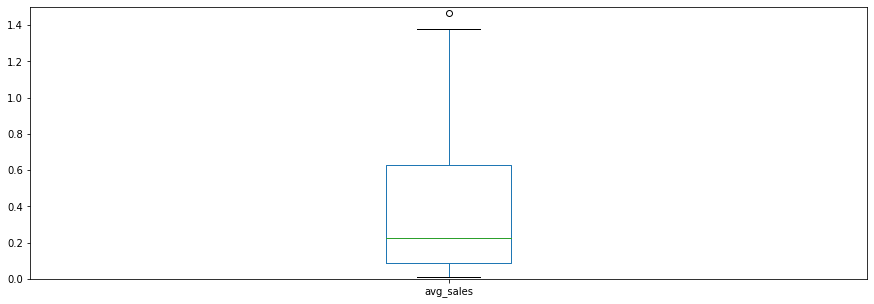

In [40]:
platform_data = actual_data.query('genre == "Platform"')
platform_data.plot(y = 'avg_sales', kind='box', figsize=(15, 5))
platform_data.plot(y = 'avg_sales', kind='box', ylim=(0,1.5), figsize=(15, 5))
platform_data['avg_sales'].describe()

count    85.000000
mean      0.469294
std       0.964101
min       0.010000
25%       0.050000
50%       0.120000
75%       0.380000
max       7.090000
Name: avg_sales, dtype: float64

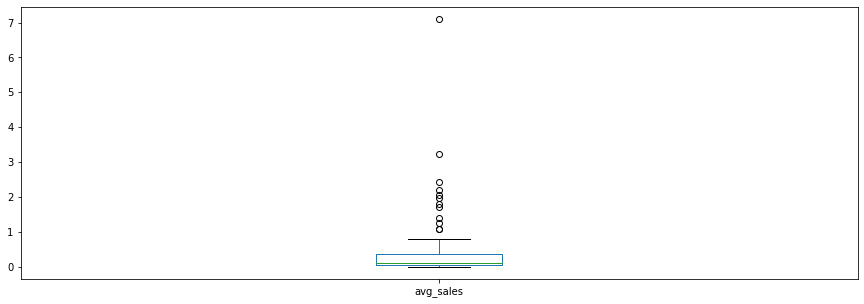

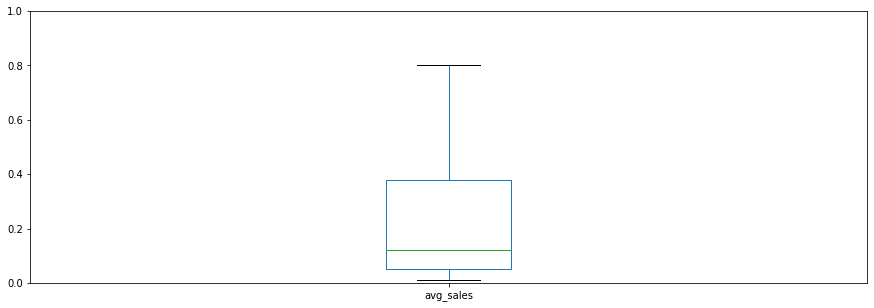

In [41]:
racing_data = actual_data.query('genre == "Racing"')
racing_data.plot(y = 'avg_sales', kind='box', figsize=(15, 5))
racing_data.plot(y = 'avg_sales', kind='box', ylim=(0,1), figsize=(15, 5))
racing_data['avg_sales'].describe()

count    80.000000
mean      0.441375
std       1.048883
min       0.010000
25%       0.060000
50%       0.125000
75%       0.322500
max       7.550000
Name: avg_sales, dtype: float64

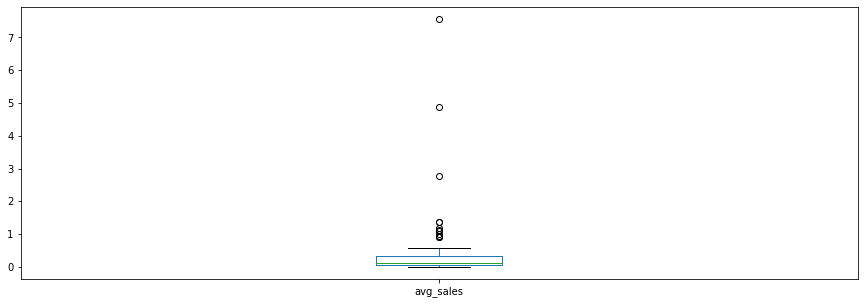

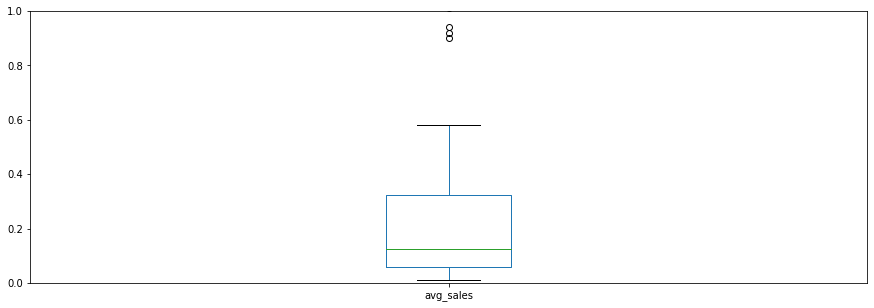

In [42]:
fighting_data = actual_data.query('genre == "Fighting"')
fighting_data.plot(y = 'avg_sales', kind='box', figsize=(15, 5))
fighting_data.plot(y = 'avg_sales', kind='box', ylim=(0,1), figsize=(15, 5))
fighting_data['avg_sales'].describe()

count    245.000000
mean       0.096490
std        0.216445
min        0.010000
25%        0.020000
50%        0.030000
75%        0.070000
max        1.660000
Name: avg_sales, dtype: float64

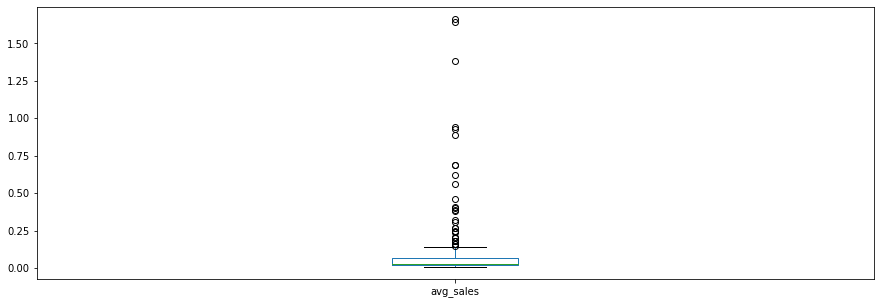

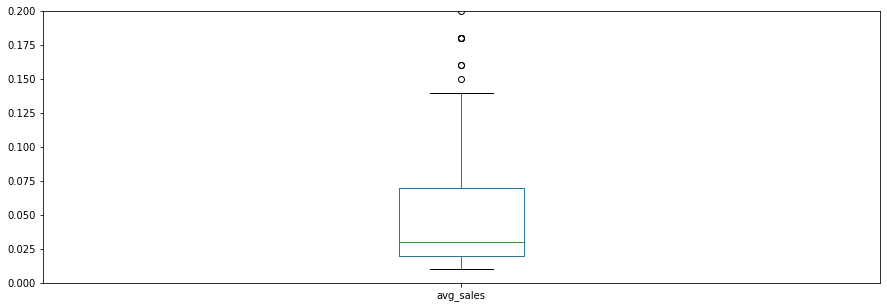

In [43]:
adventure_data = actual_data.query('genre == "Adventure"')
adventure_data.plot(y = 'avg_sales', kind='box', figsize=(15, 5))
adventure_data.plot(y = 'avg_sales', kind='box', ylim=(0,0.2), figsize=(15, 5))
adventure_data['avg_sales'].describe()

count    62.000000
mean      0.350968
std       0.849163
min       0.010000
25%       0.030000
50%       0.100000
75%       0.295000
max       5.220000
Name: avg_sales, dtype: float64

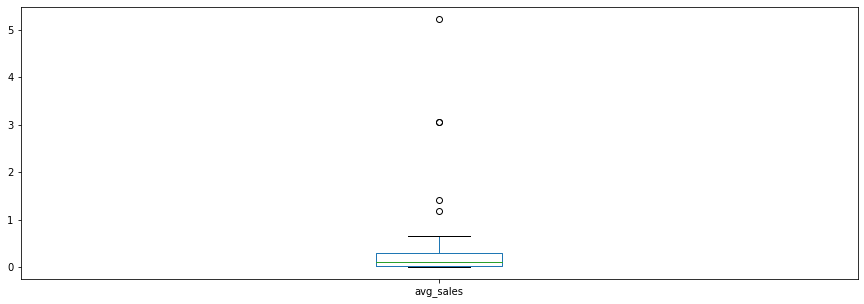

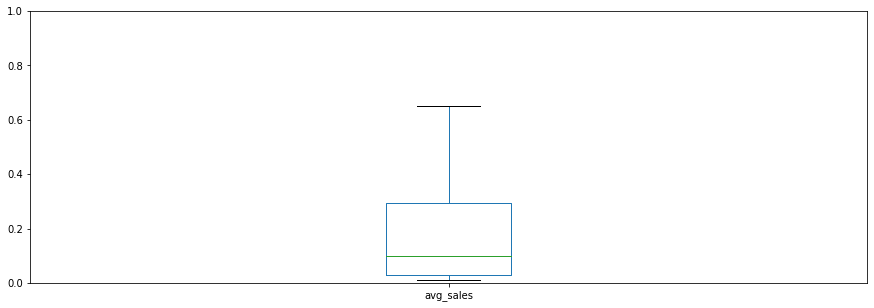

In [44]:
simulation_data = actual_data.query('genre == "Simulation"')
simulation_data.plot(y = 'avg_sales', kind='box', figsize=(15, 5))
simulation_data.plot(y = 'avg_sales', kind='box', ylim=(0,1), figsize=(15, 5))
simulation_data['avg_sales'].describe()

count    56.000000
mean      0.180000
std       0.279441
min       0.010000
25%       0.040000
50%       0.080000
75%       0.232500
max       1.670000
Name: avg_sales, dtype: float64

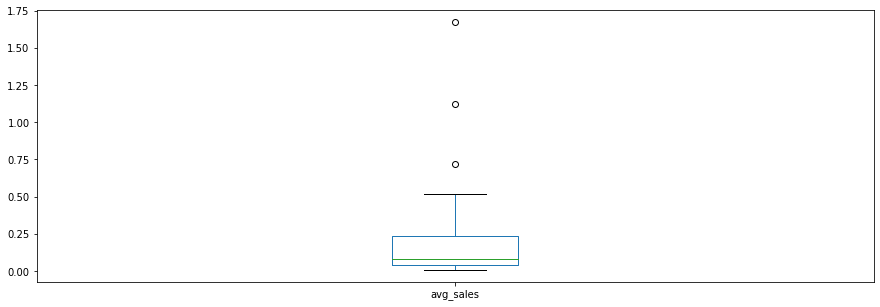

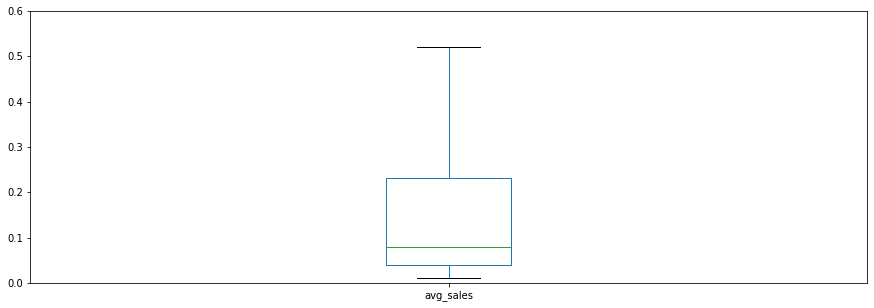

In [45]:
strategy_data = actual_data.query('genre == "Strategy"')
strategy_data.plot(y = 'avg_sales', kind='box', figsize=(15, 5))
strategy_data.plot(y = 'avg_sales', kind='box', ylim=(0,0.6), figsize=(15, 5))
strategy_data['avg_sales'].describe()

count    17.000000
mean      0.186471
std       0.325172
min       0.010000
25%       0.020000
50%       0.060000
75%       0.110000
max       1.190000
Name: avg_sales, dtype: float64

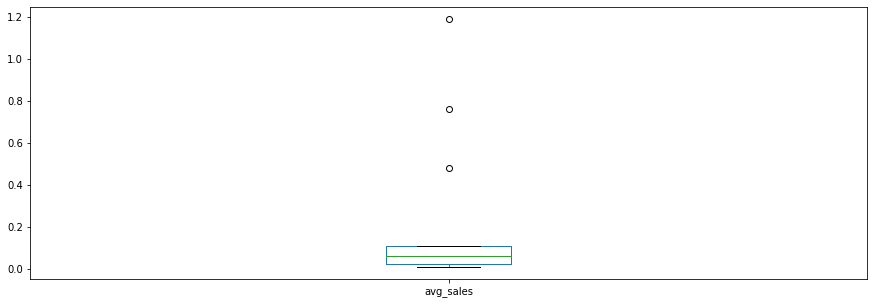

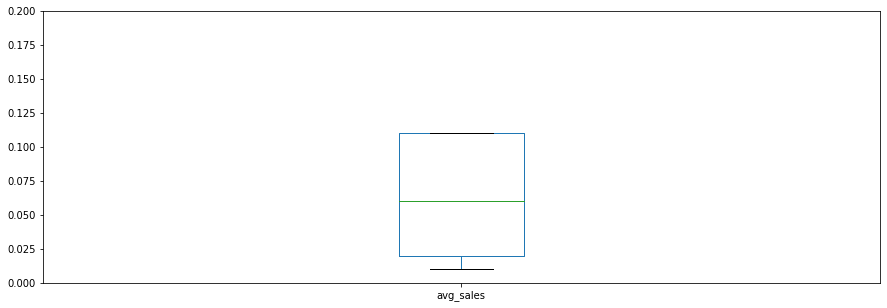

In [46]:
puzzle_data = actual_data.query('genre == "Puzzle"')
puzzle_data.plot(y = 'avg_sales', kind='box', figsize=(15, 5))
puzzle_data.plot(y = 'avg_sales', kind='box', ylim=(0,0.2), figsize=(15, 5))
puzzle_data['avg_sales'].describe()

**Вывод: Видно, что около половины продаж составляют игры следующих жанров: `Action`, `Sports`, `Shooter` `Misc` и `Role-Playing`. Они явно выделяются на фоне остальных. Наименее прибыльными являются игры жанров: `Puzzle` и `Strategy`. Так же построив диаграммы размаха видим, что у первых пяти жанров есть большие вобросы, за счет которых и получаются такие большие значения, а менее популярные жанры игр приносят в среднем меньше прибыли, но отличаются стабильностью.**

### Составим портрет пользователя каждого региона


**Выберем в качестве актуального период с 2013 года (данные за этот период собраны в таблице `actual_data`)**

In [47]:
# Создаем таблицы с данными для каждого региона

# Таблицы для Северной Америки:
na_platform_data = (
    actual_data
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .reset_index()
)
na_top_platforms = na_platform_data.head(5)
others_sum = sum(na_platform_data.loc[5:, 'na_sales'])
na_platform_data = (
    na_platform_data
    .query('platform in @na_top_platforms["platform"]')
)
last_line = {'platform' : 'others', 'na_sales' : others_sum}
na_platform_data = na_platform_data.append(last_line, ignore_index = True)


na_genre_data = (
    actual_data
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .reset_index()
)
na_top_genres = na_genre_data.head(5)
others_sum = sum(na_genre_data.loc[5:, 'na_sales'])
na_genre_data = (
    na_genre_data
    .query('genre in @na_top_genres["genre"]')
)
last_line = {'genre' : 'others', 'na_sales' : others_sum}
na_genre_data = na_genre_data.append(last_line, ignore_index = True)


na_rating_data = (
    actual_data
    .pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .reset_index()
)


# Таблицы для Европы:
eu_platform_data = (
    actual_data
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
)
eu_top_platforms = eu_platform_data.head(5)
others_sum = sum(eu_platform_data.loc[5:, 'eu_sales'])
eu_platform_data = (
    eu_platform_data
    .query('platform in @eu_top_platforms["platform"]')
)
last_line = {'platform' : 'others', 'eu_sales' : others_sum}
eu_platform_data = eu_platform_data.append(last_line, ignore_index = True)


eu_genre_data = (
    actual_data
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
)
eu_top_genres = eu_genre_data.head(5)
others_sum = sum(eu_genre_data.loc[5:, 'eu_sales'])
eu_genre_data = (
    eu_genre_data
    .query('genre in @eu_top_genres["genre"]')
)
last_line = {'genre' : 'others', 'eu_sales' : others_sum}
eu_genre_data = eu_genre_data.append(last_line, ignore_index = True)


eu_rating_data = (
    actual_data
    .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
)

# Таблицы для Японии:
jp_platform_data = (
    actual_data
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
)
jp_top_platforms = jp_platform_data.head(5)
others_sum = sum(jp_platform_data.loc[5:, 'jp_sales'])
jp_platform_data = (
    jp_platform_data
    .query('platform in @jp_top_platforms["platform"]')
)
last_line = {'platform' : 'others', 'jp_sales' : others_sum}
jp_platform_data = jp_platform_data.append(last_line, ignore_index = True)


jp_genre_data = (
    actual_data
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
)
jp_top_genres = jp_genre_data.head(5)
others_sum = sum(jp_genre_data.loc[5:, 'jp_sales'])
jp_genre_data = (
    jp_genre_data
    .query('genre in @jp_top_genres["genre"]')
)
last_line = {'genre' : 'others', 'jp_sales' : others_sum}
jp_genre_data = jp_genre_data.append(last_line, ignore_index = True)


jp_rating_data = (
    actual_data
    .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
)

Начнем анализ с популярности платформ \
Выведем топ 5 платформ каждого региона

Северная Америка:


,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20
5,others,52.49


Европа:


,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96
5,others,58.26


Япония:


,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88
5,others,4.19


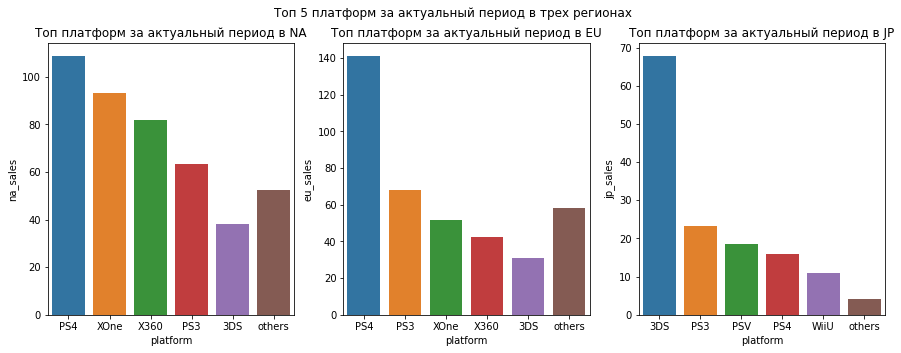

In [48]:
print('Северная Америка:')
display(na_platform_data)
print('Европа:')
display(eu_platform_data)
print('Япония:')
display(jp_platform_data)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Топ 5 платформ за актуальный период в трех регионах')
plt.subplot(1, 3, 1, title='Топ платформ за актуальный период в NA')
sns.barplot(x=na_platform_data['platform'], y=na_platform_data['na_sales'])
plt.subplot(1, 3, 2, title='Топ платформ за актуальный период в EU')
sns.barplot(x=eu_platform_data['platform'], y=eu_platform_data['eu_sales'])
plt.subplot(1, 3, 3, title='Топ платформ за актуальный период в JP')
sns.barplot(x=jp_platform_data['platform'], y=jp_platform_data['jp_sales'])
plt.show()

Видно, что самыми популярными платформами в Европе и Северной Америке являются одни и те же 5 платформ. Самой популярной в этих регионах является `PS4`. На рынке Японии популярны другие платформы. Там люди отдают предпочтение местной платформе `3DS`. Так же можно заметить, что в Японии доля платформ не из топ 5 очень мала, а в Европе и Северной Америке не топ платформы тоже имеют весомый вклад в продажи.   

Северная Америка:


,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49
5,others,62.76


Европа:


,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19
5,others,68.56


Япония:


,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61
5,others,25.79


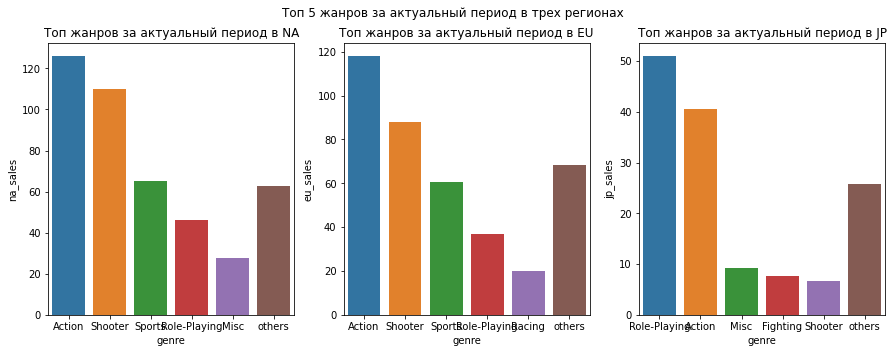

In [49]:
print('Северная Америка:')
display(na_genre_data)
print('Европа:')
display(eu_genre_data)
print('Япония:')
display(jp_genre_data)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Топ 5 жанров за актуальный период в трех регионах')
plt.subplot(1, 3, 1, title='Топ жанров за актуальный период в NA')
sns.barplot(x=na_genre_data['genre'], y=na_genre_data['na_sales'])
plt.subplot(1, 3, 2, title='Топ жанров за актуальный период в EU')
sns.barplot(x=eu_genre_data['genre'], y=eu_genre_data['eu_sales'])
plt.subplot(1, 3, 3, title='Топ жанров за актуальный период в JP')
sns.barplot(x=jp_genre_data['genre'], y=jp_genre_data['jp_sales'])
plt.show()

Видно, что спрос на Европейском и Североамериканском рынке почти одинаков. Кроме того, что в прошлом пункте мы выявили схожесть спроса на платформы, в этом пункте явно видно, что в этих двух регионах спрос на игры различных жанров так же совпадает. А вот топ 5 жанров в Японии отличаются. Там самым популярным является жанр `Role-Playing`, который в Европе и Северной Америке занимает лишь 4 место с большим отставанием от жанров `Action` и `Shooter`.

Северная Америка:


,rating,na_sales
0,M,184.77
1,E,102.09
2,T,96.61
3,E10+,54.24


Европа:


,rating,eu_sales
0,M,162.21
1,E,108.37
2,T,78.96
3,E10+,42.69


Япония:


,rating,jp_sales
0,T,86.62
1,E,33.35
2,M,14.92
3,E10+,5.89


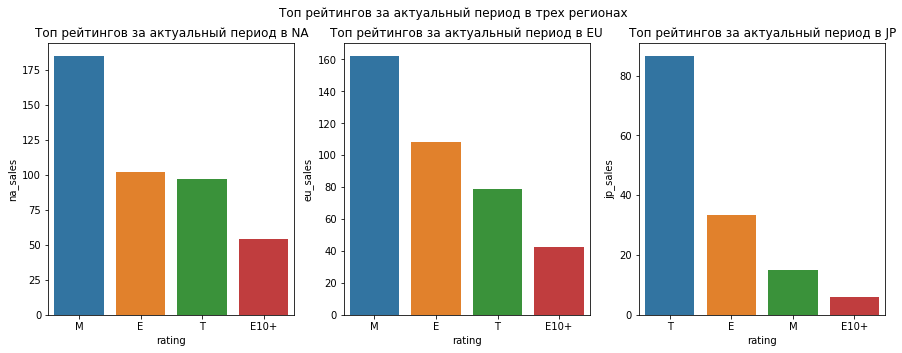

In [50]:
print('Северная Америка:')
display(na_rating_data)
print('Европа:')
display(eu_rating_data)
print('Япония:')
display(jp_rating_data)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Топ рейтингов за актуальный период в трех регионах')
plt.subplot(1, 3, 1, title='Топ рейтингов за актуальный период в NA')
sns.barplot(x=na_rating_data['rating'], y=na_rating_data['na_sales'])
plt.subplot(1, 3, 2, title='Топ рейтингов за актуальный период в EU')
sns.barplot(x=eu_rating_data['rating'], y=eu_rating_data['eu_sales'])
plt.subplot(1, 3, 3, title='Топ рейтингов за актуальный период в JP')
sns.barplot(x=jp_rating_data['rating'], y=jp_rating_data['jp_sales'])
plt.show()

Картина для Северной Америки и Европы снова повторилась, здесь самыми популярными являются игры с рейтингом `M`(Для взрослых). А вот в Японии снова другое распределение там наибольшим спросом пользуются игры категории `T`(Для подростков). На основании этого можно сделать вывод что главными потребителями для Европы и Северной Америки являются взрослые люди (от 18 и старше), а в Японии это дети от 13 лет.

**Вывод: Все три изученные параметра влияют на продажи. Так например для Японского рынка, в отличии от Европейского и Североамериканского, популярностью пользуются в основном местные игровые платформы. Самыми продаваемыми играми в Северной Америке и Европе являются игры для взрослых (рейтинг 'M' по  ESRB), в Японии игры для подростков (рейтинг 'T' по  ESRB). Популярные жанры похожи для Европы и Северной Америки, но в Японии преобладают игры совсем не похожие на два других региона.**

### Проверим две гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [51]:
XOne = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] > 0)]['user_score']
PC = actual_data[(actual_data['platform'] == 'PC') &  (actual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC 6.2696774193548395


Сформулируем две гипотезы:
- H0: Средние пользовательские рейтинги платформ Xbox One и PC равны
- H1: Средние пользовательские рейтинги платформ Xbox One и PC различны

In [52]:
alpha = .05
results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод: Данные не противоречат нулевой гипотезе. Средние пользовательские рейтинги платформ Xbox One и PC равны для выбранного нами доверительного интервала в 5%**

#### Средние пользовательские рейтинги жанров Action и Sports разные.

In [54]:
Action = actual_data[(actual_data['genre'] == 'Action') &  (actual_data['user_score'] > 0)]['user_score']
Sports = actual_data[(actual_data['genre'] == 'Sports') &  (actual_data['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())

Средний пользовательский рейтинг жанра Action: 6.837532133676092
Средний пользовательский рейтинг жанра Sports 5.238124999999999


Для удобства расчетов, сформулируем две гипотезы следующим образом:
- H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1: Средние пользовательские рейтинги жанров Action и Sports различны

In [55]:
alpha = .05
results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод: Полученное p-value позволяет нам отвергнуть гипотезу H0. Таким образом, практически невероятно получить одинакове средние рейнтинги по двум выбрвнным жанрам.**

### Вывод

1) В предоставленных данных присутствует большое количество пропусков, часть из которых не представляется возможным заполнить их самостоятельно на основе данных из таблицы. Так в таблице довольно много пропусков в столбцах `critic_score`, `user_score` и `rating`, так как новые игрвы просто не успелли получить свои оценки пользователей и критиков.

2) На основе предоставленных данных было отбранно 6 потенциально прибыльных платформ для выпуска игр:
- `PS4`
- `XOne`
- `PC`
- `PSV`
- `3DS`
- `WiiU`

3) Так же было проведено исследование зависимости продаж от оценок критиков и пользователей. Можем сказать, что оценки критиков сильнее влияют на количество продаж, чем оценки пользователей и в целом существует довольно большая положительная корреляция между оценками критиков и успешностью игры. 

4) После обработки данных выяснилось, что около 75% продаж составляют игры следующих жанров: Action, Sports, Shooter Misc и Role-Playing. Они явно выделяются на фоне остальных. Наименее прибыльными являются игры жанров: Puzzle и Strategy.

5) Проведенно исследование успешности игр для каждого из представленных регионов:

- Северная Америка: 
        Игры, которые будут продаваться лучше всего:
        ESRB: M, E, T 
        Платформы: PS4, XOne, Xbox360, PS3, 3DS
        Жанры: Action, Shooter, Sports, Role-Playing, Misc
- Европа:
        Игры, которые будут продаваться лучше всего: 
        ESRB: M, E, T 
        Платформы: PS4, PS3, XOne, X360, 3DS
        Жанры: Action,  Shooter, Sports, Role-Playing, Racing
- Япония:
       Игры, которые будут продаваться в  лучше всего:
       ESRB: T, E, M
       Платформы: 3DS, PS3, PSV, PS4, WiiU
       Жанры: Role-Playing, Action, Misc, Fighting, Shooter